# Normalising a distribution

#### Inspirations from https://chrisalbon.com/python/data_wrangling/pandas_normalize_column/ and https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

Note: few of the ideas here are experimental

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

In [3]:
# data = {'score': [234, 24, 14, 27,-74,45,73,-18,59,160] }
num_of_points=20
scale = 0.1
centre_of_distribution = 0.0
data = {'score': np.random.normal(centre_of_distribution, scale, num_of_points) }

In [4]:
df = pd.DataFrame(data)
df

,score
0,-0.176591
1,-0.010656
2,-0.092630
3,0.029202
4,0.145553
5,0.086680
6,0.042975
7,0.036686
8,-0.094991
9,-0.107927


## Raw data

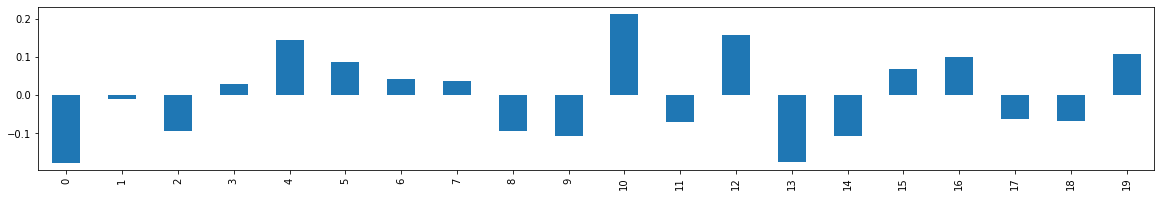

In [5]:
df['score'].plot(kind='bar')

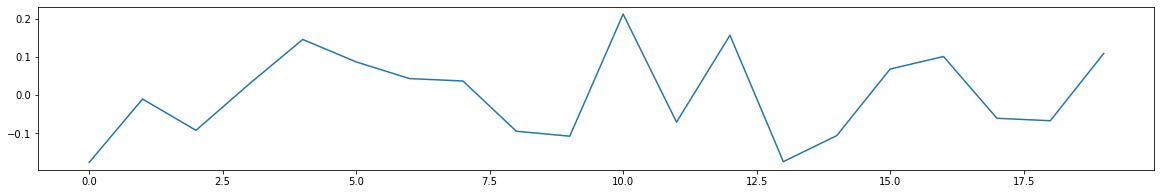

In [30]:
df['score'].plot()

In [6]:
df['score'].describe()

count    20.000000
mean      0.001186
std       0.113436
min      -0.176591
25%      -0.093220
50%       0.009273
75%       0.090217
max       0.211896
Name: score, dtype: float64

## Removing minimum value from all numbers (inspecting a step)

In [7]:
df['score_min_removed'] = df['score'] - df['score'].min()

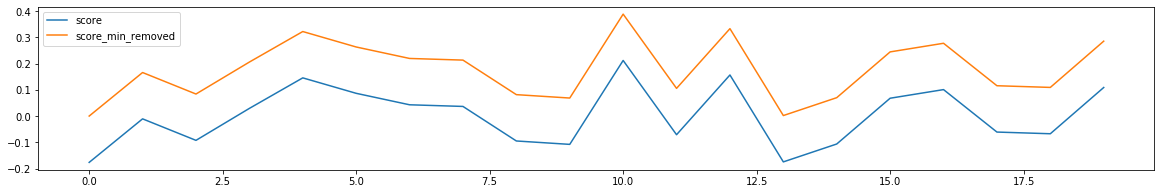

In [8]:
df[['score','score_min_removed']].plot()

#### Note: don't be surprised that the plot of `score_min_removed` looks higher on the number-line axis than `score`. `min` value is a negative number, removing a negative value from a positive value only increases the positive value i.e. `x - (-y) = x + y`

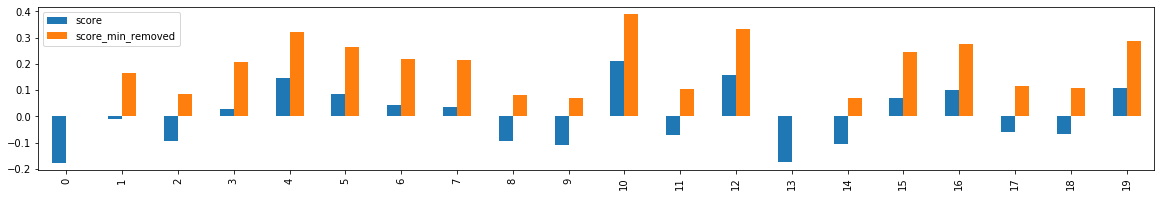

In [9]:
df[['score','score_min_removed']].plot(kind='bar')

## Removing mean from all numbers (inspecting a step)

In [10]:
df['score_mean_removed'] = df['score'] - df['score'].mean()

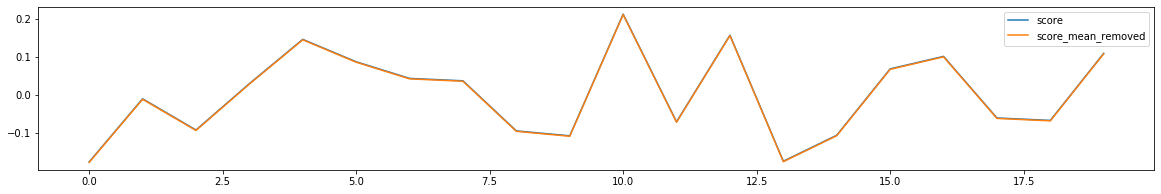

In [11]:
df[['score','score_mean_removed']].plot()

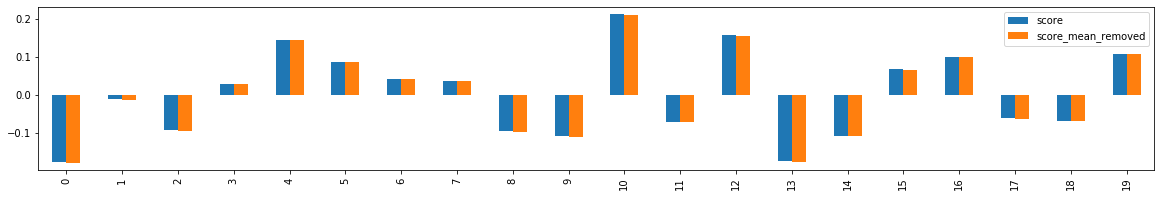

In [12]:
df[['score','score_mean_removed']].plot(kind='bar')

## Comparing: raw, minimum value removed from raw, mean removed from raw

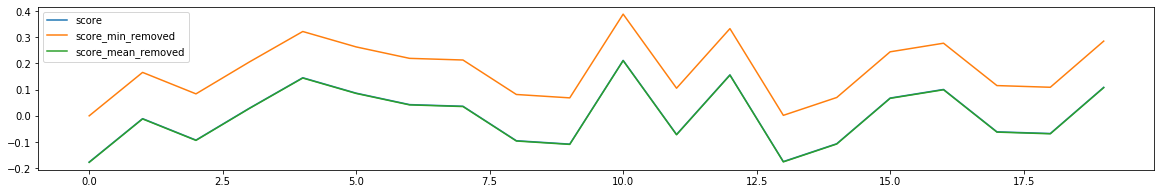

In [31]:
df[['score','score_min_removed','score_mean_removed']].plot()

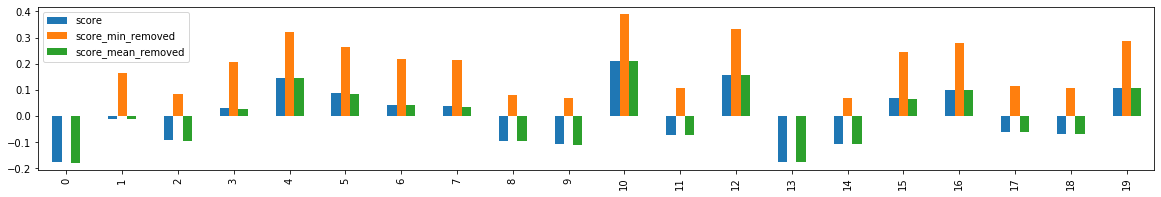

In [14]:
df[['score','score_min_removed','score_mean_removed']].plot(kind='bar')

#### Interesting to see that the plots of `score_min_removed` and `score_mean_removed` are quite close to each other

## Normalise mean (using scikit-learn's normalize function)

In [15]:
from sklearn.preprocessing import normalize

In [16]:
values = normalize(np.array(df['score']).reshape(1,-1))
print(values[0])
df['score_sklearn_normalize'] = values[0]

[-0.35712218 -0.0215501  -0.18732563  0.05905626  0.29435234  0.17529405
  0.08690875  0.07419138 -0.19210112 -0.21826097  0.4285188  -0.14373475
  0.31661413 -0.3532543  -0.21536327  0.1374428   0.20390148 -0.12338049
 -0.1363573   0.22015096]


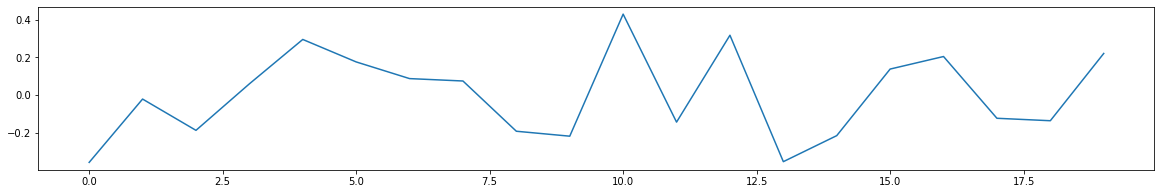

In [17]:
df['score_sklearn_normalize'].plot()

## Normalise by mean method

In [18]:
def normalise_mean(data):
    return (data - data.mean()) / data.std()

In [19]:
df['score_normalise_mean'] = normalise_mean(df['score'])
df['score_normalise_mean']

0    -1.567207
1    -0.104398
2    -0.827038
3     0.246977
4     1.272668
5     0.753675
6     0.368390
7     0.312954
8    -0.847855
9    -0.961890
10    1.857520
11   -0.637019
12    1.369711
13   -1.550346
14   -0.949259
15    0.588676
16    0.878379
17   -0.548292
18   -0.604860
19    0.949213
Name: score_normalise_mean, dtype: float64

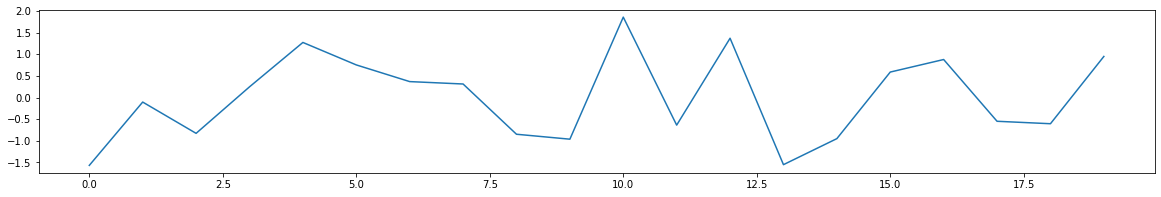

In [20]:
df['score_normalise_mean'].plot()

## Normalise by min-max method

In [21]:
def normalise_min_max(data):
    return (data - data.max()) / (data.max() - data.min())

In [22]:
df['score_normalise_min_max'] = normalise_min_max(df['score'])
df['score_normalise_min_max']

0    -1.000000
1    -0.572868
2    -0.783875
3    -0.470269
4    -0.170773
5    -0.322316
6    -0.434817
7    -0.451004
8    -0.789954
9    -0.823251
10    0.000000
11   -0.728391
12   -0.142437
13   -0.995077
14   -0.819563
15   -0.370495
16   -0.285903
17   -0.702483
18   -0.719000
19   -0.265220
Name: score_normalise_min_max, dtype: float64

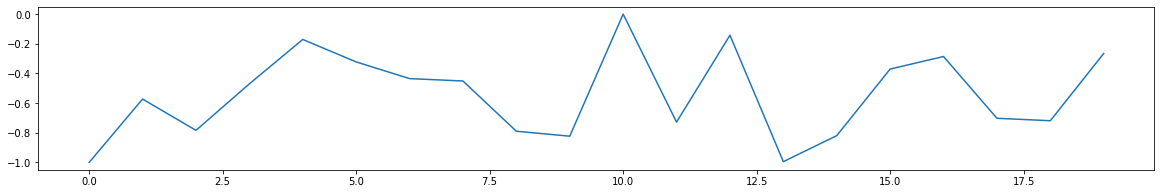

In [23]:
df['score_normalise_min_max'].plot()

In [ ]:
import numpy as np

## Normalise using exp

In [34]:
df['score_exp'] = df['score'].apply(np.exp)
df['score_exp']

0     0.838122
1     0.989400
2     0.911531
3     1.029633
4     1.156679
5     1.090548
6     1.043912
7     1.037368
8     0.909381
9     0.897693
10    1.236019
11    0.931392
12    1.169482
13    0.839727
14    0.898981
15    1.070326
16    1.106084
17    0.940814
18    0.934796
19    1.115008
Name: score_exp, dtype: float64

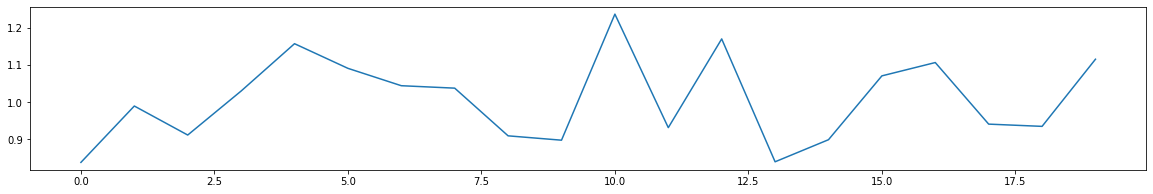

In [35]:
df['score_exp'].plot()

## Normalise using natural log (base e)

In [36]:
df['score_log_base_e'] = df['score'].apply(np.log)
df['score_log_base_e']

0          NaN
1          NaN
2          NaN
3    -3.533505
4    -1.927218
5    -2.445530
6    -3.147136
7    -3.305347
8          NaN
9          NaN
10   -1.551661
11         NaN
12   -1.854311
13         NaN
14         NaN
15   -2.688787
16   -2.294358
17         NaN
18         NaN
19   -2.217682
Name: score_log_base_e, dtype: float64

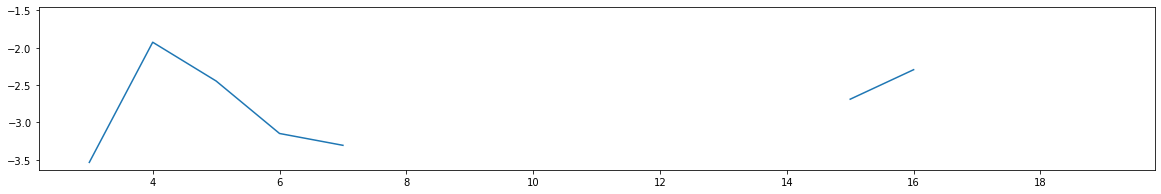

In [37]:
df['score_log_base_e'].plot()

## Normalise using log (base 10)

In [38]:
df['score_log_base_10'] = df['score'].apply(np.log10)
df['score_log_base_10']

0          NaN
1          NaN
2          NaN
3    -1.534582
4    -0.836980
5    -1.062080
6    -1.366784
7    -1.435494
8          NaN
9          NaN
10   -0.673878
11         NaN
12   -0.805317
13         NaN
14         NaN
15   -1.167725
16   -0.996427
17         NaN
18         NaN
19   -0.963127
Name: score_log_base_10, dtype: float64

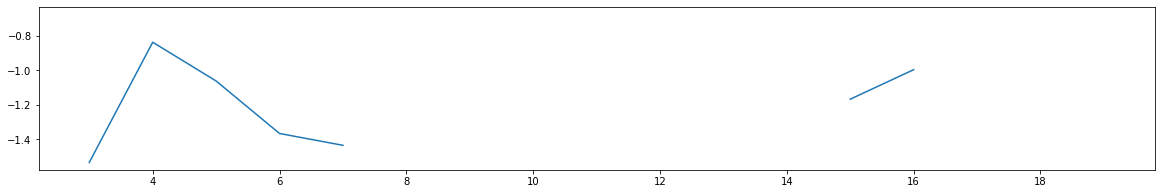

In [39]:
df['score_log_base_10'].plot()

## Comparing all Normalise actions together (mean, min-max, scikitlearn normalize, exp, log base e, log base 10)

In [28]:
df.columns

Index(['score', 'score_min_removed', 'score_mean_removed',
       'score_sklearn_normalize', 'score_normalise_mean',
       'score_normalise_min_max', 'score_log_base_e', 'score_log_base_10'],
      dtype='object')

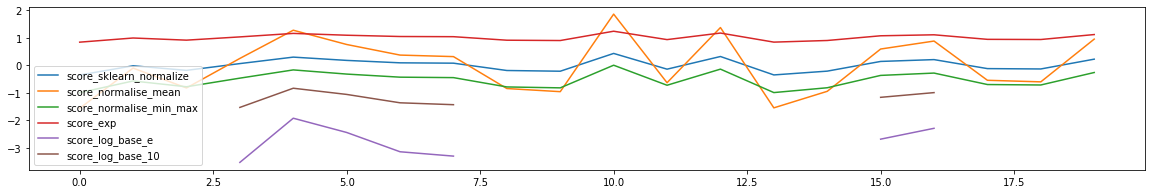

In [40]:
columns_to_show = ['score_sklearn_normalize', 'score_normalise_mean', 'score_normalise_min_max', 
                   'score_exp', 'score_log_base_e', 'score_log_base_10']
plt.plot(df[columns_to_show])
plt.legend(columns_to_show)

#### `score_normalise_mean` is a lot less smoother than `score_sklearn_normalize` or `score_normalise_min_max`, while the log variants are discontinuous. Although discontinuous, they do trace the deviations of the other plots.